# Simulate binary and catepillar tree

Mamie Wang 05/11/20

Goal: 

- Additional test of the spectral tree method on two simulated datasets
- plot the influenza tree as an example
- organize the result from influenza tree

In [2]:
import sys, os

sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'../spectral-tree-inference/spectraltree'))

import numpy as np
import utils
import generation
import reconstruct_tree
import dendropy
import scipy
import time
from itertools import product
import matplotlib.pyplot as plt

from dendropy.model.discrete import simulate_discrete_chars, Jc69, Hky85
from dendropy.calculate.treecompare import symmetric_difference

## Binary tree


A complete binary tree of 512 terminal nodes and n=1000 samples

- compare between 1. RAXML, 2. deep+RAXML, 3. deep+NJ, 4. deep+SNJ, 5. NJ and SNJ

In [2]:
m = 128
n = 1000

binary_tree = utils.balanced_binary(m)

In [3]:
binary_tree.write(path='/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/binary_tree.newick',
                     schema = "newick")

In [2]:
# results from the catepillar tree
import pandas as pd
perf_metrics = pd.read_csv("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/script/binary_angle.csv")
perf_metrics = perf_metrics.loc[:, ["method", "threshold", "runtime", "RF", "F1"]]
has_threshold = perf_metrics.threshold != "None"
perf_metrics.loc[has_threshold,'method'] = perf_metrics.loc[has_threshold,'method'] + " " + perf_metrics.loc[has_threshold,'threshold']
perf_summarized = perf_metrics.groupby("method").agg(['mean', 'std']).round(2).sort_values([('F1', 'mean')], ascending=False)
perf_summarized

runtime            RF            F1      
                    mean    std   mean    std   mean   std
method                                                    
raxml             763.20  37.44   41.9   6.97  97.95  0.34
raxml sp deep 64  254.41   7.96   52.8   9.23  97.42  0.45
raxml sp deep 32  152.95   4.13   66.6  10.01  96.74  0.49
nj sp deep 32      56.10   1.65   79.0   7.99  96.14  0.39
raxml sp deep 16   88.56   2.25   80.2   7.54  96.08  0.37
nj sp deep 64      56.13   1.69   80.4   6.95  96.07  0.34
nj sp deep 16      56.31   1.71   88.7  10.08  95.66  0.49
nj                 76.27   2.81   99.8   7.62  95.12  0.37
snj                78.61   2.03  264.6  15.22  87.05  0.74

## Catepillar tree

A caterpillar tree with m=128 terminal nodes and 1000 samples

- compare between 1. RAXML, 2. deep+RAXML, 3. deep+NJ, 4. deep+SNJ, 5. NJ and SNJ

In [3]:
m = 128
n = 1000
catepillar_tree = utils.lopsided_tree(m, edge_length = 1)

In [4]:
catepillar_tree.write(path='/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/catepillar.newick',
                     schema = "newick")

In [3]:
m = 32
n = 1000
catepillar_tree = utils.lopsided_tree(m, edge_length = 1)
catepillar_tree.write(path='/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/catepillar_32_leaves.newick',
                     schema = "newick")

In [1]:
# results from the catepillar tree
import pandas as pd
perf_metrics = pd.read_csv("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/script/catepillar_angle.csv")
perf_metrics = perf_metrics.loc[:, ["method", "threshold", "runtime", "RF", "F1"]]
has_threshold = perf_metrics.threshold != "None"
perf_metrics.loc[has_threshold,'method'] = perf_metrics.loc[has_threshold,'method'] + " " + perf_metrics.loc[has_threshold,'threshold']
perf_summarized = perf_metrics.groupby("method").agg(['mean', 'std']).round(2).sort_values([('F1', 'mean')], ascending=False)
perf_summarized

runtime            RF            F1       
                    mean    std   mean    std   mean    std
method                                                     
raxml sp deep 32   33.79   2.08   42.8  53.62  91.57  10.56
raxml sp deep 16   18.86   1.72   49.7  57.38  90.22  11.29
nj sp deep 16       3.42   0.04   51.1  59.09  89.94  11.63
raxml sp deep 64   42.57   2.14   54.7  69.14  89.23  13.61
nj sp deep 32       3.38   0.03   80.4  81.93  84.17  16.13
raxml              56.51  10.30  103.7  81.96  79.59  16.13
nj sp deep 64       3.36   0.04  124.6  55.86  75.47  11.00
snj                 4.02   0.07  227.3   3.26  55.26   0.64
nj                  3.54   0.02  231.1  23.58  54.51   4.64

## Plot the trees

In [1]:
library(ape)

In [2]:
H3N2_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/NY_H3N2.newick"
catepillar_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/catepillar_32_leaves.newick"
binary_tree_path = '/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/binary_tree.newick'

In [3]:
H3N2_tree = read.tree(H3N2_path)
catepillar_tree = read.tree(catepillar_path)
binary_tree = read.tree(binary_tree_path)

png 
  2

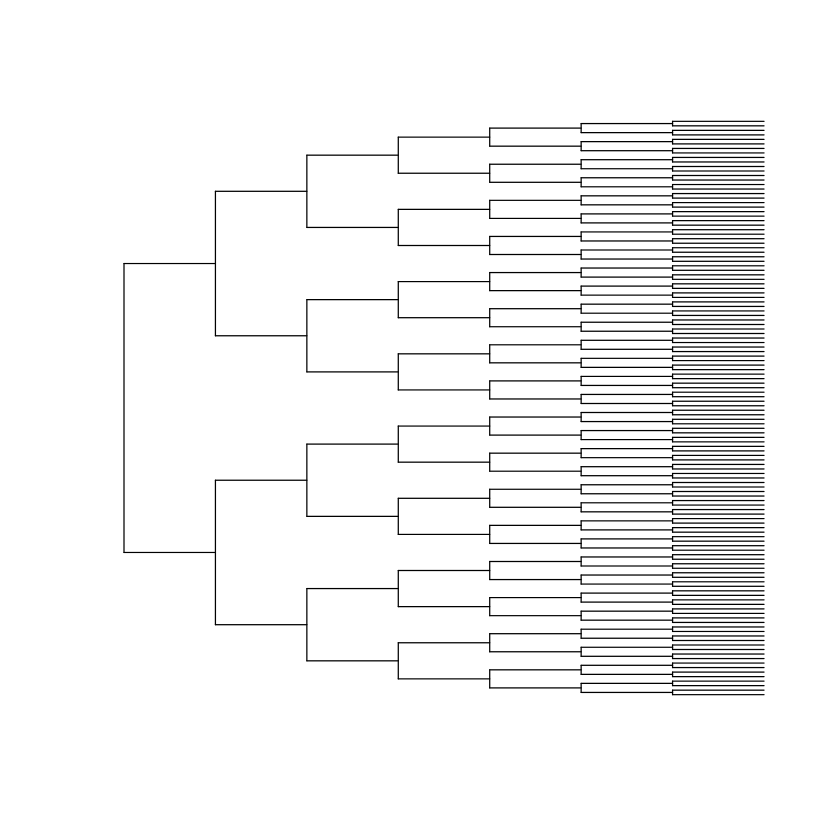

In [5]:
plot(ladderize(binary_tree), show.tip.label = F,  use.edge.length = T)

svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/binary_tree.svg")
plot(ladderize(binary_tree), show.tip.label = F)
dev.off()

png 
  2

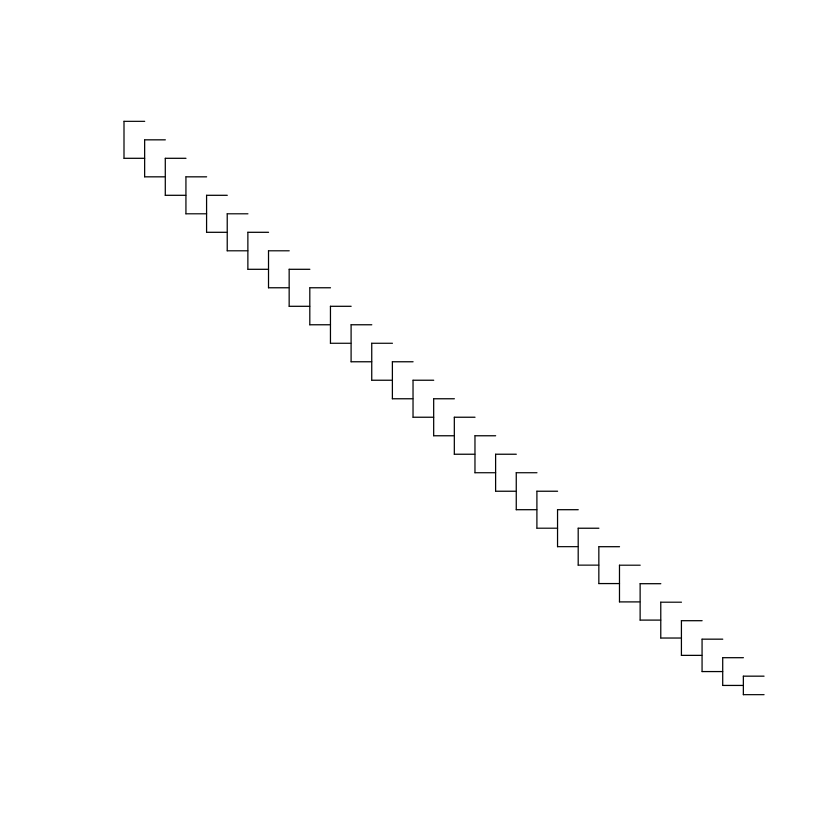

In [5]:
plot(catepillar_tree, show.tip.label = F,  use.edge.length = T)

svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/catepillar_tree_32.svg")
plot(ladderize(catepillar_tree), show.tip.label = F)
dev.off()

png 
  2

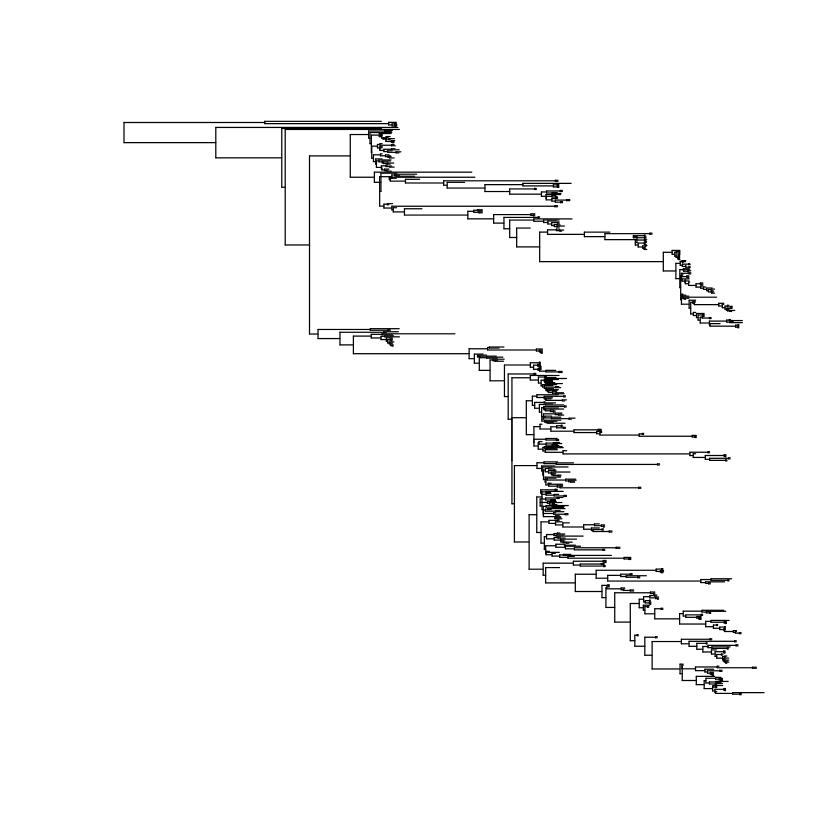

In [7]:
# plot the beast tree
plot(ladderize(H3N2_tree), show.tip.label = F)

# save the plot
svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/H3N2_tree.svg")
plot(ladderize(H3N2_tree), show.tip.label = F)
dev.off()